<a href="https://colab.research.google.com/github/bernardarthur0123-netizen/foundation-/blob/main/machine_learning_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%reset -f
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load data
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target * 100000 # Price in dollars ($)

# Simplification: We use only 3 key variables
key_variables = ['MedInc', 'HouseAge', 'AveRooms']
X = X[key_variables]

# Visualization
df_housing = X.copy()
df_housing['Price'] = y
df_housing.head()

,MedInc,HouseAge,AveRooms,Price
0,8.3252,41.0,6.984127,452600.0
1,8.3014,21.0,6.238137,358500.0
2,7.2574,52.0,8.288136,352100.0
3,5.6431,52.0,5.817352,341300.0
4,3.8462,52.0,6.281853,342200.0


In [2]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training data: {X_train.shape[0]}")
print(f"Test data: {X_test.shape[0]}")

Training data: 14448
Test data: 6192


In [3]:
# Initialize and train
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

print("Regression Model trained.")

Regression Model trained.


In [4]:
# Prediction
y_pred = lin_reg_model.predict(X_test)

# Visualize prediction results in a DataFrame
df_results = X_test.copy()
df_results['Actual_Price'] = y_test
df_results['Prediction'] = y_pred

# Format adjustment for clean visualization
pd.options.display.float_format = '{:,.0f}'.format
df_results.head()

,MedInc,HouseAge,AveRooms,Actual_Price,Prediction
20046,2,25,4,"47,700","107,051"
3024,3,30,5,"45,800","150,876"
15663,3,52,4,"500,001","232,559"
20484,6,17,6,"218,600","267,810"
9814,4,34,5,"278,000","209,206"


In [5]:
# Regression Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Average Error (RMSE): ${rmse:,.0f}")
print(f"Fit Quality (R2): {r2:.2f}")

Average Error (RMSE): $79,979
Fit Quality (R2): 0.51


In [6]:
coefs = lin_reg_model.coef_

df_interpret = pd.DataFrame({
    'Variable': key_variables,
    'Coefficient ($)': coefs
})

# Currency format
df_interpret['Coefficient ($)'] = df_interpret['Coefficient ($)'].map('${:,.0f}'.format)
print(df_interpret)

   Variable Coefficient ($)
0    MedInc         $44,192
1  HouseAge          $1,684
2  AveRooms         $-2,551


In [7]:
%reset -f
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load data
iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

df_iris = X.assign(target=y)
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5,4,1,0,0
1,5,3,1,0,0
2,5,3,1,0,0
3,5,3,2,0,0
4,5,4,1,0,0


In [8]:
# Split into training and test sets
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print("Data split")

Data split


In [10]:
# max_iter=1000 ensures convergence
log_reg_model = LogisticRegression(max_iter=1000, random_state=123)
log_reg_model.fit(X_train, y_train)

print("Trained Logistic Model.")

Trained Logistic Model.


In [11]:
# Prediction
y_pred = log_reg_model.predict(X_test)

# Visualize prediction results
df_results = X_test.copy()
df_results['target'] = y_test
df_results['prediction'] = y_pred
df_results.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,prediction
72,6,2,5,2,1,1
112,7,3,6,2,2,2
132,6,3,6,2,2,2
88,6,3,4,1,1,1
37,5,4,1,0,0,0


In [12]:
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nReport:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[18  0  0]
 [ 0 10  0]
 [ 0  3 14]]

Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.77      1.00      0.87        10
           2       1.00      0.82      0.90        17

    accuracy                           0.93        45
   macro avg       0.92      0.94      0.92        45
weighted avg       0.95      0.93      0.93        45



In [13]:
setosa_coefs = log_reg_model.coef_[0]
odds_ratio = np.exp(setosa_coefs)

df_interpret = pd.DataFrame({
    'Variable': X.columns,
    'Coefficient': setosa_coefs,
    'Multiplier (e^Coef)': odds_ratio
})
print(df_interpret.sort_values(by='Coefficient', ascending=False))

            Variable  Coefficient  Multiplier (e^Coef)
1   sepal width (cm)            1                    2
0  sepal length (cm)           -0                    1
3   petal width (cm)           -1                    0
2  petal length (cm)           -2                    0


In [14]:
%reset -f
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load data
iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

df_iris = X.assign(target=y)
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5,4,1,0,0
1,5,3,1,0,0
2,5,3,1,0,0
3,5,3,2,0,0
4,5,4,1,0,0


In [15]:
# Split into training and test sets
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print("Data split")

Data split


In [16]:
# Define the parameter grid to test
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs']
}

# Configure GridSearchCV
log_reg_tuning = LogisticRegression(max_iter=1000, random_state=123)
grid_search = GridSearchCV(estimator=log_reg_tuning,
                           param_grid=param_grid,
                           cv=5,
                           verbose=0)

# Execute the search
grid_search.fit(X_train, y_train)

# Show the best parameters found
print("\nBest C found:", grid_search.best_params_['C'])


Best C found: 10


In [17]:
# The best model is already trained in .best_estimator_
best_log_reg = grid_search.best_estimator_

# Predict the test set with the tuned model
y_pred_tuned = best_log_reg.predict(X_test)

# Visualize prediction results
df_results = X_test.copy()
df_results['target'] = y_test
df_results['prediction'] = y_pred_tuned
df_results.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,prediction
72,6,2,5,2,1,1
112,7,3,6,2,2,2
132,6,3,6,2,2,2
88,6,3,4,1,1,1
37,5,4,1,0,0,0


In [18]:
print("--- Confusion Matrix of the Tuned Model ---")
print(confusion_matrix(y_test, y_pred_tuned))

print("\n--- Classification Report of the Tuned Model ---")
print(classification_report(y_test, y_pred_tuned))

--- Confusion Matrix of the Tuned Model ---
[[18  0  0]
 [ 0 10  0]
 [ 0  1 16]]

--- Classification Report of the Tuned Model ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.91      1.00      0.95        10
           2       1.00      0.94      0.97        17

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45



In [19]:
# Coefficients of the tuned model (best_log_reg)
tuned_coefs = best_log_reg.coef_[0]
tuned_odds_ratio = np.exp(tuned_coefs)

df_interpret_tuned = pd.DataFrame({
    'Variable': X.columns,
    'Coefficient': tuned_coefs,
    'Multiplier (e^Coef)': tuned_odds_ratio
})
print(df_interpret_tuned.sort_values(by='Coefficient', ascending=False))

            Variable  Coefficient  Multiplier (e^Coef)
1   sepal width (cm)            2                    7
0  sepal length (cm)           -0                    1
3   petal width (cm)           -2                    0
2  petal length (cm)           -4                    0


In [20]:
%reset -f
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree

# Load data
iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# Data visualization
# target: 0:setosa, 1:versicolor, 2:virginica
df_iris = X.assign(target=y)
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5,4,1,0,0
1,5,3,1,0,0
2,5,3,1,0,0
3,5,3,2,0,0
4,5,4,1,0,0


In [21]:
# Split into training and test sets
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print("Data split")

Data split


In [22]:
# Create the DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=123)

# Train the model
dt_model.fit(X_train, y_train)
print("Model trained.")

Model trained.


In [23]:
# Prediction
y_pred = dt_model.predict(X_test)

# Visualize prediction results
df_results = X_test.copy()
df_results['actual_class'] = y_test
df_results['prediction'] = y_pred
df_results.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),actual_class,prediction
72,6,2,5,2,1,1
112,7,3,6,2,2,2
132,6,3,6,2,2,2
88,6,3,4,1,1,1
37,5,4,1,0,0,0


In [24]:
# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification report (Precision)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[18  0  0]
 [ 0 10  0]
 [ 0  2 15]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.83      1.00      0.91        10
           2       1.00      0.88      0.94        17

    accuracy                           0.96        45
   macro avg       0.94      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



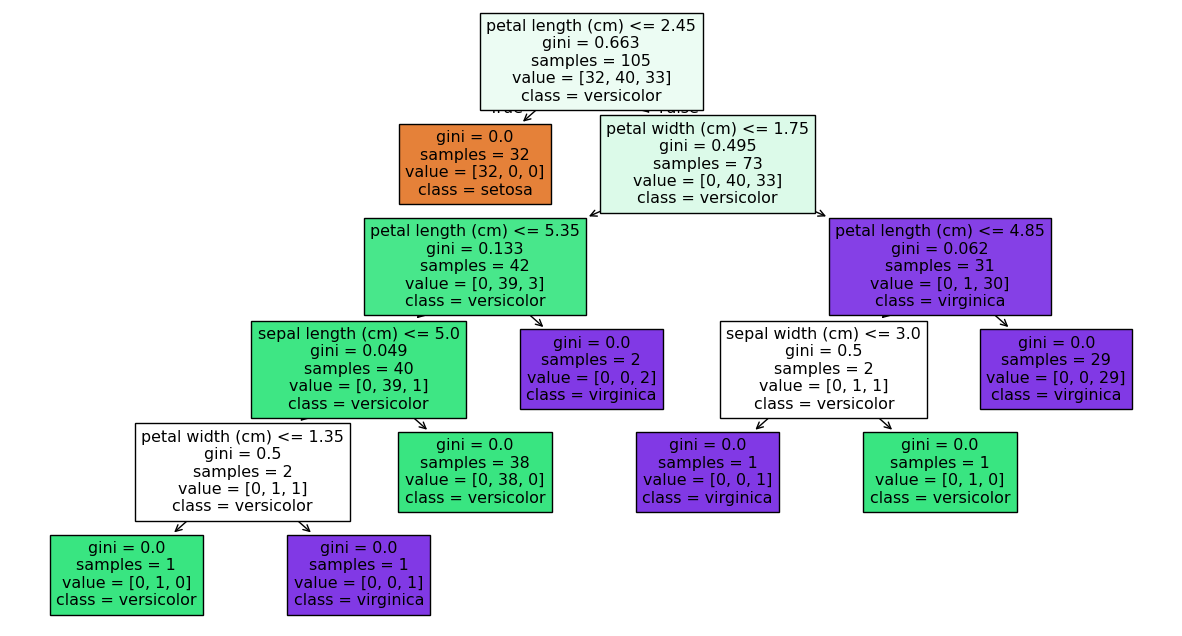

In [25]:
plt.figure(figsize=(15, 8))
tree.plot_tree(dt_model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

In [26]:
%reset -f
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree

# Load data
iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# Data visualization
# target: 0:setosa, 1:versicolor, 2:virginica
df_iris = X.assign(target=y)
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5,4,1,0,0
1,5,3,1,0,0
2,5,3,1,0,0
3,5,3,2,0,0
4,5,4,1,0,0


In [27]:
# Split into training and test sets
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print("Data split")

Data split


In [28]:
# Define the parameter grid to test
param_grid = {
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Configure GridSearchCV
tree_for_tuning = DecisionTreeClassifier(random_state=123)
grid_search = GridSearchCV(estimator=tree_for_tuning,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           verbose=0) # Verbose 0 to not clutter the output

# Execute the search
grid_search.fit(X_train, y_train)

# Show the best parameters found
print("\nBest parameters found:")
print(grid_search.best_params_)


Best parameters found:
{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [29]:
# The best model is already trained in .best_estimator_
best_tree = grid_search.best_estimator_

# Predict the test set with the tuned model
y_pred_tuned = best_tree.predict(X_test)

# Visualize prediction results
df_results = X_test.copy()
df_results['actual_class'] = y_test
df_results['prediction'] = y_pred_tuned
df_results.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),actual_class,prediction
72,6,2,5,2,1,1
112,7,3,6,2,2,2
132,6,3,6,2,2,2
88,6,3,4,1,1,1
37,5,4,1,0,0,0


In [30]:
print("--- Confusion Matrix of the Tuned Tree ---")
print(confusion_matrix(y_test, y_pred_tuned))

print("\n--- Classification Report of the Tuned Tree ---")
print(classification_report(y_test, y_pred_tuned))

--- Confusion Matrix of the Tuned Tree ---
[[18  0  0]
 [ 0 10  0]
 [ 0  3 14]]

--- Classification Report of the Tuned Tree ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.77      1.00      0.87        10
           2       1.00      0.82      0.90        17

    accuracy                           0.93        45
   macro avg       0.92      0.94      0.92        45
weighted avg       0.95      0.93      0.93        45



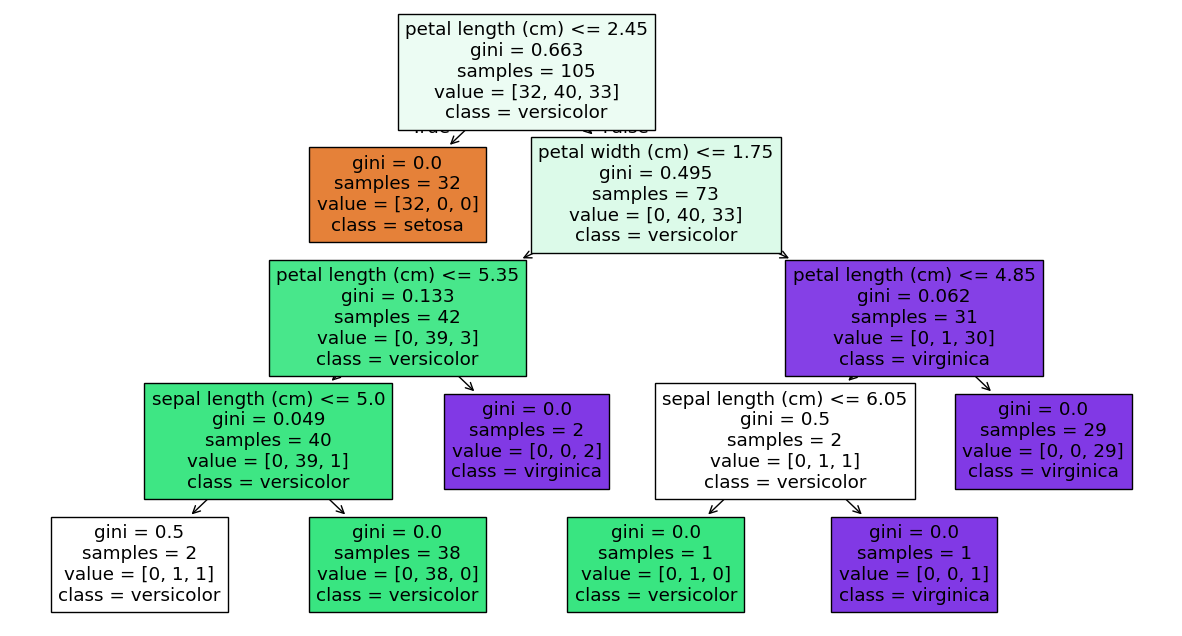

In [31]:
plt.figure(figsize=(15, 8))
tree.plot_tree(best_tree, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

In [32]:
# Train a model with default parameters for comparison
default_tree = DecisionTreeClassifier(random_state=123)
default_tree.fit(X_train, y_train)

# Accuracy of the original model
acc_default = default_tree.score(X_test, y_test)

# Accuracy of the new tuned model
acc_tuned = best_tree.score(X_test, y_test)

print(f"Default Tree Accuracy: {acc_default:.2%}")
print(f"Tuned Tree Accuracy:    {acc_tuned:.2%}")

Default Tree Accuracy: 95.56%
Tuned Tree Accuracy:    93.33%
